In [2]:
#ライブラリの読み込み
import numpy as np
import scipy as sp
import pandas as pd
from pandas import Series, DataFrame

%precision 3

#可視化用
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set()
%matplotlib inline

#seed値の固定
np.random.seed(0)

確率

In [3]:
#数学的確率

#サイコロがとりうる値を配列に格納
dice_data = np.array([1,2,3,4,5,6])

In [4]:
#引数は、対象データ(dice_data)から１つランダムに抽出するという意味
print('１つだけランダムに抽出:',np.random.choice(dice_data, 1))

１つだけランダムに抽出: [5]


In [5]:
#統計的確率

#サイコロを1,000回振ってみる
calc_steps = 1000

#1~6のデータの中から、1000回の抽出を実施
dice_rolls = np.random.choice(dice_data, calc_steps)

#それぞれの数字がどれくらいの割合で抽出されたか計算
for i in range(1,7):
    p = len(dice_rolls[dice_rolls == i]) / calc_steps
    print(i, 'が出る確率', p)

1 が出る確率 0.171
2 が出る確率 0.158
3 が出る確率 0.157
4 が出る確率 0.183
5 が出る確率 0.16
6 が出る確率 0.171


さまざまな分布関数

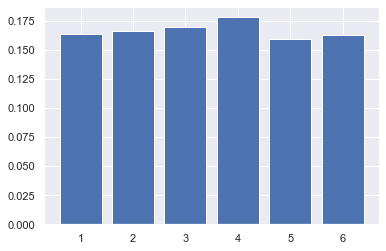

In [6]:
#一様分布:確率変数Xがどの値をとっても確率密度関数f(x)が一定の値をとる

#サイコロを1000回振る
calc_steps = 1000

#1~6のデータの中から1000回の抽出を実施
dice_rolls = np.random.choice(dice_data, calc_steps)

#それぞれの数字がどれくらいの割合で抽出されたか計算
prob_data = np.array([]) #空のnumpy配列の作成
for i in range(1,7):
    p = len(dice_rolls[dice_rolls==i]) / calc_steps #それぞれの結果の割合を求める
    prob_data = np.append(prob_data, p) #numpy配列に格納
    
plt.bar(dice_data,prob_data)
plt.grid(True)

In [7]:
prob_data

array([0.164, 0.166, 0.17 , 0.178, 0.159, 0.163])

0 が出る確率 0.625
1 が出る確率 0.375


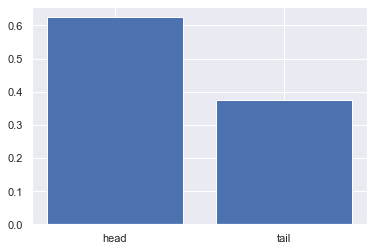

In [8]:
#ベルヌーイ分布:結果が2種類しかない試行において各事象が生じる確率の分布

# 0:head(表),1:tail(裏)と考える
#サンプル数を8とした
prob_be_data = np.array([])
coin_data = np.array([0,0,0,0,0,1,1,1])

# uniqueで一意な値を抽出(ここの場合は、0と1)
for i in np.unique(coin_data):
    p = len(coin_data[coin_data==i]) / len(coin_data)
    print(i,'が出る確率',p)
    prob_be_data = np.append(prob_be_data, p)

plt.bar([0,1], prob_be_data, align='center')
plt.xticks([0,1],['head','tail'])
plt.grid(True)

In [9]:
prob_be_data

array([0.625, 0.375])

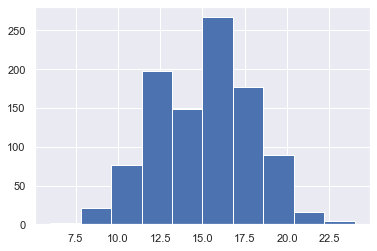

In [10]:
#二項分布:ベルヌーイ試行をn回繰り返したもの

#seed値の固定
np.random.seed(0)

#二項分布の作成(試行回数が30回の時、確率0.5の事象(表or裏)が起こる回数。1000回セットを実行する。)
x = np.random.binomial(30,0.5,1000)

plt.hist(x)
plt.grid(True)

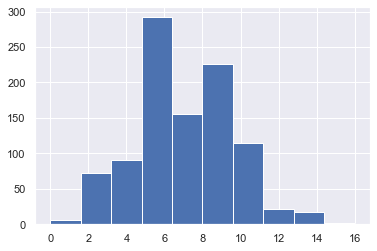

In [11]:
#ポアソン分布:二項分布の試行回数(n)を限りなく大きくし、確率(p)を限りなく小さくしたもの。稀な事象が起きるときに使う。

#seed値の固定
np.random.seed(0)

#ポアソン分布の作成(ある区間で事象が起こると見込まれる回数(λ=7)。1000回セットを実行する。)
x = np.random.poisson(7,1000)

plt.hist(x)
plt.grid(True)

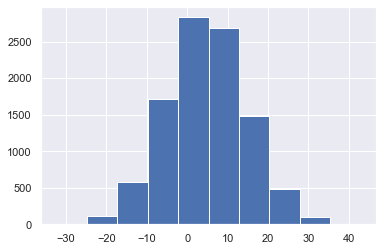

In [12]:
#正規分布

#seed値の固定
np.random.seed(0)

#np.random.normal(平均,標準偏差,サンプル数)
x = np.random.normal(5,10,10000)
plt.hist(x)
plt.grid(True)

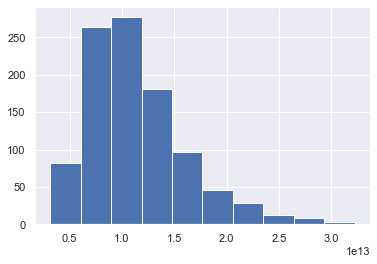

In [13]:
#対数正規分布

#seed値の固定
np.random.seed(0)

#np.random.lognormal(平均,標準偏差,サンプル数)
x = np.random.lognormal(30,0.4,1000)
plt.hist(x)
plt.grid(True)

カーネル密度関数

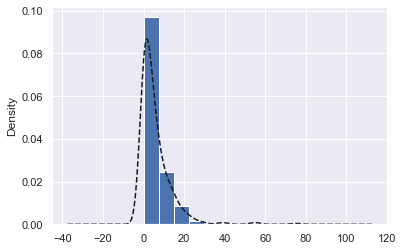

In [20]:
#データの取り込み
student_data_math = pd.read_csv('./sample_data/student-mat.csv',sep=';')

#カーネル密度関数(与えられたデータを使って密度関数を推定)の場合kind=kdeを指定
student_data_math.absences.plot(kind='kde', style='k--')

#単純なヒストグラム
student_data_math.absences.hist(density=True)
plt.grid(True)

応用:多次元確率分布(確率変数が2つ以上)

In [24]:
#必要なライブラリの読み込み
import scipy.stats as st
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D

#データの設定
x,y = np.mgrid[10:100:2,10:100:2]

pos = np.empty(x.shape + (2,))
pos[:,:,0] = x
pos[:,:,1] = y

In [25]:
pos

array([[[10., 10.],
        [10., 12.],
        [10., 14.],
        ...,
        [10., 94.],
        [10., 96.],
        [10., 98.]],

       [[12., 10.],
        [12., 12.],
        [12., 14.],
        ...,
        [12., 94.],
        [12., 96.],
        [12., 98.]],

       [[14., 10.],
        [14., 12.],
        [14., 14.],
        ...,
        [14., 94.],
        [14., 96.],
        [14., 98.]],

       ...,

       [[94., 10.],
        [94., 12.],
        [94., 14.],
        ...,
        [94., 94.],
        [94., 96.],
        [94., 98.]],

       [[96., 10.],
        [96., 12.],
        [96., 14.],
        ...,
        [96., 94.],
        [96., 96.],
        [96., 98.]],

       [[98., 10.],
        [98., 12.],
        [98., 14.],
        ...,
        [98., 94.],
        [98., 96.],
        [98., 98.]]])

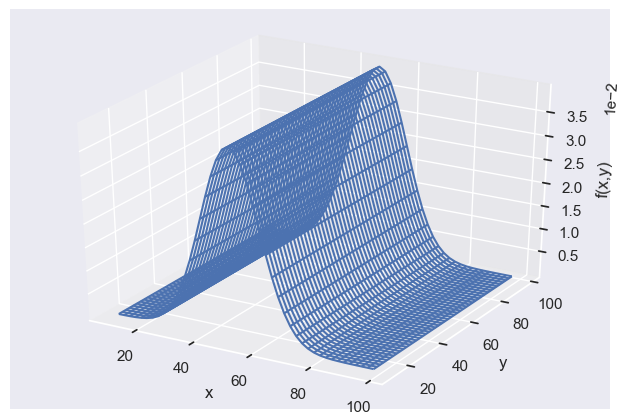

In [28]:
#多次元正規分布
#それぞれの変数の平均と分散共分散列を設定
#以下の例では、xとyの平均がそれぞれ50と50、[[100,0],[0,100]]がxとyの共分散行列になります
rv = multivariate_normal([50,50],[100,0],[0,100])

#確率密度関数
z = rv.pdf(pos)

fig = plt.figure(dpi=100)
ax = Axes3D(fig)
ax.plot_wireframe(x,y,z)

#x,y,zラベルの設定
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')

#z軸の表示メモリ単位を変更、sciが指数表示、axisで軸を設定、scilimits=(n,m)はnからmの外にあるものは指数表記
#sciliimits=(0,0)は全ての指数表記にするという意味
ax.ticklabel_format(style='sci', axis='z', scilimits=(0,0))